# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

              RetailSales  RetailTransfers  WarehouseSales
ItemType                                                  
BEER            12.770966        14.302858      148.408969
DUNNAGE          0.000000         0.000000    -1416.593750
KEGS             0.000000         0.000000       11.973062
LIQUOR          10.911288        11.768018        1.168198
NON-ALCOHOL     12.913965        14.424156       13.784586
REF              5.516471         3.370980     -132.431373
STR_SUPPLIES     9.396038        33.912264        0.000000
WINE             3.963231         4.308592        5.475795


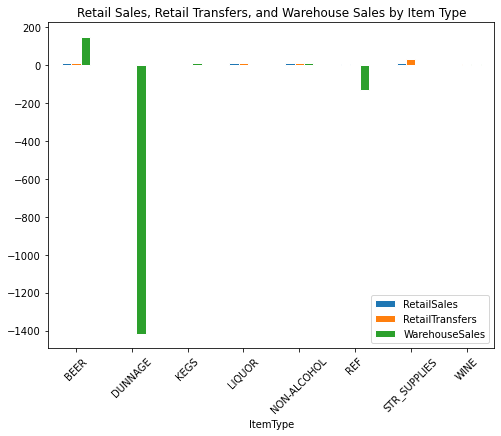

In [9]:
my_pivot=data.pivot_table(index=['ItemType'])
my_pivot=my_pivot.drop('Year', 1)
my_pivot=my_pivot.drop('Month', 1)
print(my_pivot)

my_pivot.plot.bar(title='Retail Sales, Retail Transfers, and Warehouse Sales by Item Type',
                  figsize=(8,6),
                  edgecolor = "white")
plt.legend().set_visible(True)
plt.xticks(rotation = 45)
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

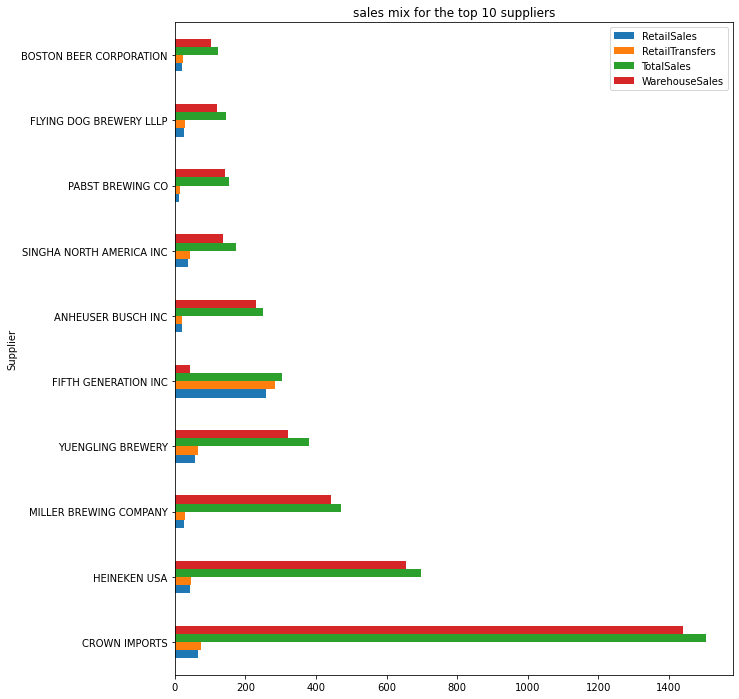

In [10]:
data['TotalSales']=data['RetailSales']+data['WarehouseSales']

my_pivot=data.pivot_table(index='Supplier').sort_values(by=['TotalSales'], ascending=False)
my_pivot=my_pivot.drop('Year', 1)
my_pivot=my_pivot.drop('Month', 1)
my_pivot_top10=my_pivot.iloc[:10]
my_pivot_top10

my_pivot_top10.plot.barh(title='sales mix for the top 10 suppliers', figsize=(10,12))

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

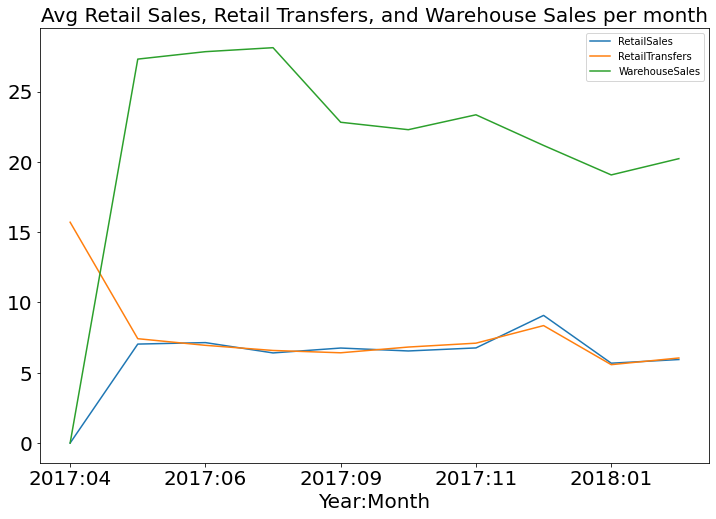

In [38]:
from datetime import datetime

def to_date(num):
    year=str(num)[0:4]
    month=str(num)[4:6]
    day='01'
    date_str=f'{day}/{month}/{year}'
    date=datetime.strptime(date_str, '%d/%m/%Y')
    return date

def year_month (num):
    year=str(num)[0:4]
    month=str(num)[4:6]
    y_m=f'{year}:{month}'
    return y_m

data['Year-Month']=data['Year']*100+data['Month']
data['Year-Month']=data['Year-Month'].map(year_month)
data
data.astype({'Year-Month':'str'})


my_data=data.pivot_table(index='Year-Month')
my_data=my_data.drop('Year', 1)
my_data=my_data.drop('Month', 1)
my_data=my_data.drop('TotalSales', 1)

my_data.reset_index()

my_data.plot(figsize=(12,8), fontsize=20 )
plt.title('Avg Retail Sales, Retail Transfers, and Warehouse Sales per month',fontsize=20)
plt.xlabel('Year:Month', fontsize=20)
plt.show()

## 4. Plot the same information as above but as a bar chart.

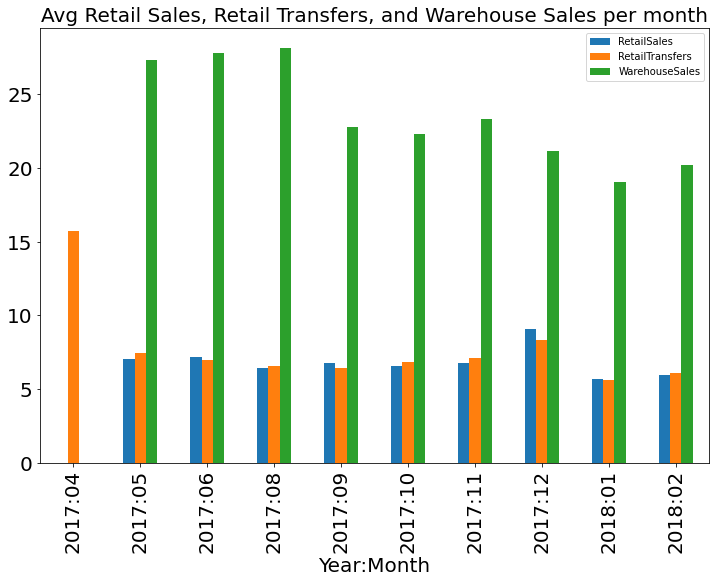

In [43]:
my_data.plot(kind='bar', figsize=(12,8), fontsize=20)
plt.title('Avg Retail Sales, Retail Transfers, and Warehouse Sales per month',fontsize=20)
plt.xlabel('Year:Month', fontsize=20)
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

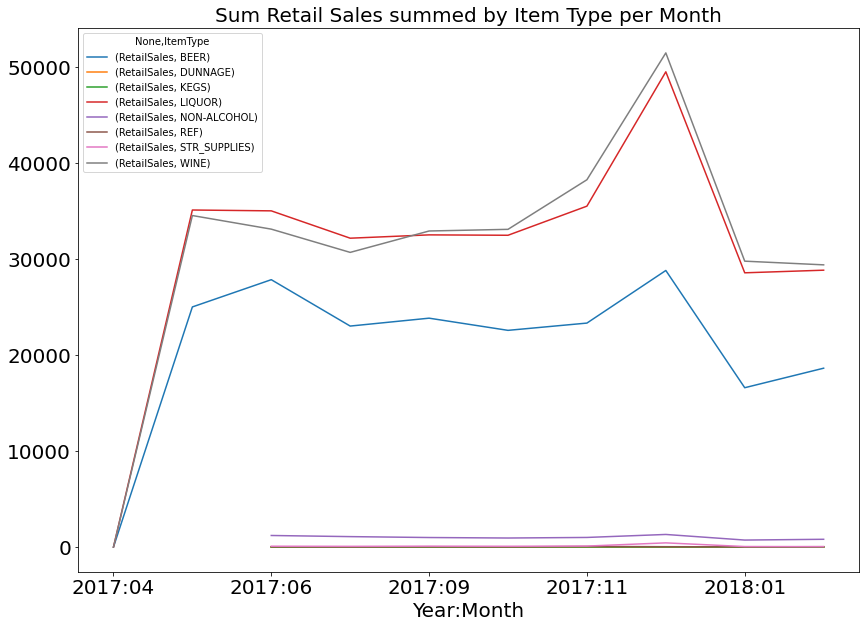

In [57]:
my_data=data.pivot_table(index='Year-Month', columns='ItemType', aggfunc='sum')
my_data=my_data.drop('Year', 1)
my_data=my_data.drop('Month', 1)
my_data=my_data.drop('TotalSales', 1)
my_data=my_data.drop('WarehouseSales', 1)
my_data=my_data.drop('RetailTransfers', 1)
my_data.reset_index()

my_data.plot(figsize=(14,10), fontsize=20 )
plt.title('Sum Retail Sales summed by Item Type per Month',fontsize=20)
plt.xlabel('Year:Month', fontsize=20)
plt.show()


## 6. Plot the same information as above but as a bar chart.

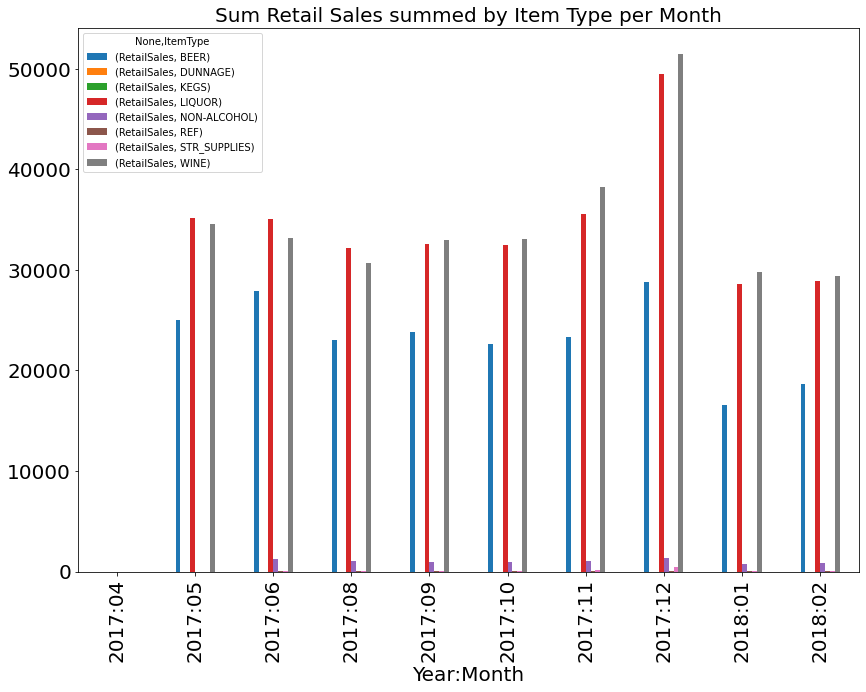

In [58]:
my_data.plot(kind='bar',figsize=(14,10), fontsize=20 )
plt.title('Sum Retail Sales summed by Item Type per Month',fontsize=20)
plt.xlabel('Year:Month', fontsize=20)
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

              RetailSales  RetailTransfers
ItemType                                  
BEER            12.770966        14.302858
DUNNAGE          0.000000         0.000000
KEGS             0.000000         0.000000
LIQUOR          10.911288        11.768018
NON-ALCOHOL     12.913965        14.424156
REF              5.516471         3.370980
STR_SUPPLIES     9.396038        33.912264
WINE             3.963231         4.308592


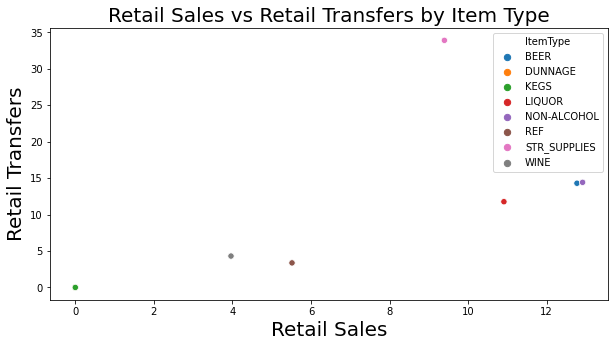

In [95]:
my_data=data.pivot_table(index='ItemType', aggfunc='mean')
my_data=my_data.drop('Year', 1)
my_data=my_data.drop('Month', 1)
my_data=my_data.drop('TotalSales', 1)
my_data=my_data.drop('WarehouseSales', 1)
print(my_data)
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_data, x='RetailSales', y='RetailTransfers', hue=my_data.index, size=my_data.index, sizes=(40,40))
plt.title('Retail Sales vs Retail Transfers by Item Type',fontsize=20)
plt.xlabel('Retail Sales', fontsize=20)
plt.ylabel('Retail Transfers', fontsize=20)
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

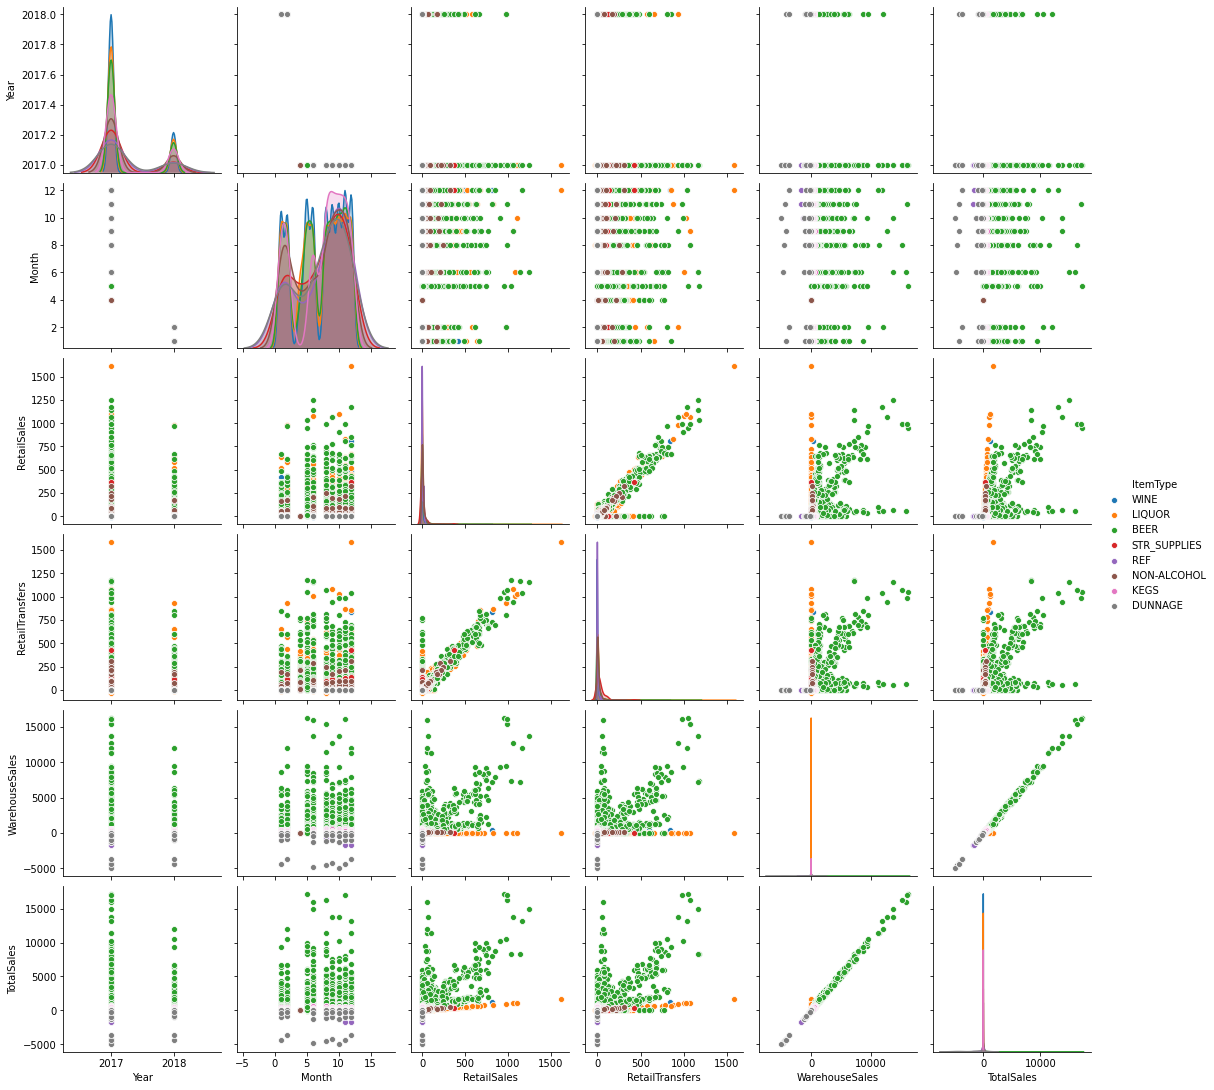

In [100]:
sns.pairplot(data=data, hue='ItemType')